In [2]:
import pickle
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [9]:
word_level_comms = []
# for l in load_obj("main_cores"):
#     print(l)

for comm in load_obj("main_cores"):
    total = []
    for c in comm:
        total.extend(c.split(","))
    word_level_comms.append(total)
print(len(word_level_comms))

44


In [4]:
time_sweep = 5
path_to_raw = "../GDELT_actant_corr/ExtractedGDELTData/"
ordered_list = []
for root, dirs, files in os.walk(path_to_raw):
   for dirname in sorted(dirs):
        ordered_list.append(path_to_raw + dirname + "/into_relex.txt")

In [5]:
inspect_paths = []
for i in range(len(ordered_list) - time_sweep + 1):
    inspect_paths.append(ordered_list[i:i+time_sweep])

In [6]:
def extract_text(link):
    with open(link, 'r') as file:
        data = file.read().replace('\n', '')
    return data

total_corpi = []
for set_of_raw in inspect_paths:
    corpus = []
    for link in set_of_raw:
        corpus.extend(extract_text(link).lower().split())
    total_corpi.append(corpus)

In [15]:
def find_graph(corpus, comm):
    tot_sum = 0
    for word in comm:
        for c in corpus:
            if c == word:
                tot_sum += 1
    return tot_sum / (len(comm)*len(corpus))

traj = []
#for comm in word_level_comms:
for comm in [["5g","waves","antenna","radio","towers"],["army","us","bioweapon"],["lab","science","wuhan"],["jews"]]:
    total_data = []
    for corpus in total_corpi:
        data = find_graph(corpus, comm)
        total_data.append(data)
    traj.append(total_data)

Text(0, 0.5, 'Fraction of Words')

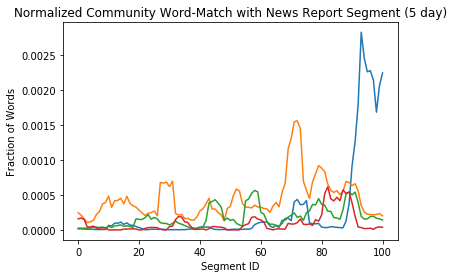

In [19]:
# Community Trends in the News Report
# Cross Correlation in Time and find the delay parameter?
import matplotlib.pyplot as plt
for l in [0,1,2,3]: 
    plt.plot(traj[l])

plt.title("Normalized Community Word-Match with News Report Segment (5 day)")
plt.xlabel("Segment ID")
plt.ylabel("Fraction of Words")

In [34]:
# Conditional occurence of actants
import re
#list_of_actants = ["qanon","donald trump", "conspiracy theory", "5g", "waves"]
path = "../GDELT_actant_corr/Results0423/communities.txt"
a = b = c = 0

actant1 = "qanon"
actant2 = "donald trump"

with open(path) as f:
    list_lines = f.readlines()
    for l in list_lines:
        match  = re.findall(r'{(.+?)}', l)
        for m in match:
            words = m.split(", ")
            for word in words:
                if "qanon" in words and "donald trump" in words:
                    a += 1
                elif "qanon" in words:
                    b += 1
                elif "donald trump" in words:
                    c += 1

print("Probability of Communal Sharing: " + actant1 + " | " + actant2, a / b)
print("Probability of Communal Sharing: " + actant2 + " | " + actant1, a / c)

Probability of Communal Sharing: qanon | donald trump 0.38333333333333336
Probability of Communal Sharing: donald trump | qanon 0.10087719298245613


Text(0, 0.5, 'Number of Paths')

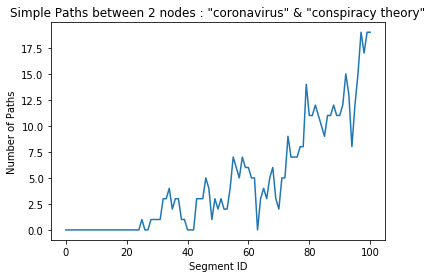

In [25]:
# Number of Distinct simple paths between two nodes (coronavirus, conspiracy theory)
path = "../GDELT_actant_corr/Results0423/simple_path.txt"
with open(path) as f:
    g = f.readlines()
    simple_paths = [int(gi) for gi in g]

plt.plot(simple_paths)
plt.title("Simple Paths between 2 nodes : \"coronavirus\" & \"conspiracy theory\"")
plt.xlabel("Segment ID")
plt.ylabel("Number of Paths")